In [65]:
import plotly.graph_objects as go
import pandas as pd

In [66]:
df = pd.read_csv('balancee_sheet.csv')

In [67]:
df

,Metric,Access Bank,GTBank
0,Total_Assets,11731964,5436035
1,Total_Liabilities,10681,6076
2,Shareholders_Funds,1050028,883227


In [62]:
fig = go.Figure()

for index, row in df.iterrows():
    fig.add_trace(go.Bar(
        x=['Access Bank', 'GTBank'],
        y=[row['Access Bank'], row['GTBank']],
        name=row['Metric'],
        legend="legend"
        #marker_color='rgb(49,130,189)' if row['Metric'] == 'Interest Income' else 'rgb(189,189,189)'  # Specify colors for specific metrics
    ))

fig.update_legends(
)

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=True,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=True,  # Corrected to show legend
    plot_bgcolor='white'
)


# Title
fig.update_layout(
    title='Access Bank vs. GTBank Metrics',
    title_font=dict(family='Arial', size=30, color='rgb(37,37,37)'),
)

fig.show()


In [47]:
fig = go.Figure()

for index, row in df.iterrows():
    fig.add_trace(go.Bar(
        x=['Access Bank', 'GTBank'],
        y=[row['Access Bank'], row['GTBank']],
        name=row['Metric']
    ))

# Manually add legend items
for metric in df['Metric']:
    fig.add_trace(go.Scatter(
        x=[None],
        y=[None],
        mode='markers',
        marker=dict(size=0),
        name=metric
    ))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=True,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=True,
    plot_bgcolor='white'
)

# Title
fig.update_layout(
    title='Access Bank vs. GTBank Metrics',
    title_font=dict(family='Arial', size=30, color='rgb(37,37,37)'),
)
fig.show()
fig.write_image('Metric.svg', format='svg', validate=True)

In [71]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Your DataFrame df and other code here...

fig = go.Figure()

for index, row in df.iterrows():
    fig.add_trace(go.Bar(
        x=['Access Bank', 'GTBank'],
        y=[row['Access Bank'], row['GTBank']],
        name=row['Metric'],  # Use the 'Metric' column to label traces in the legend
        #marker_color='rgb(49,130,189)' if row['Metric'] == 'Interest Income' else 'rgb(189,189,189)'  # Specify colors for specific metrics
    ))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=True,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=True,  # This will display the legend
    plot_bgcolor='white'
)

# Title
fig.update_layout(
    title='Access Bank vs. GTBank Metrics',
    title_font=dict(family='Arial', size=30, color='rgb(37,37,37)'),
)

fig.show()
pyo.plot(fig, filename='interactive_plot.html')
#fig.write_image('Metric.svg', format='svg', validate=True)

'interactive_plot.html'

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

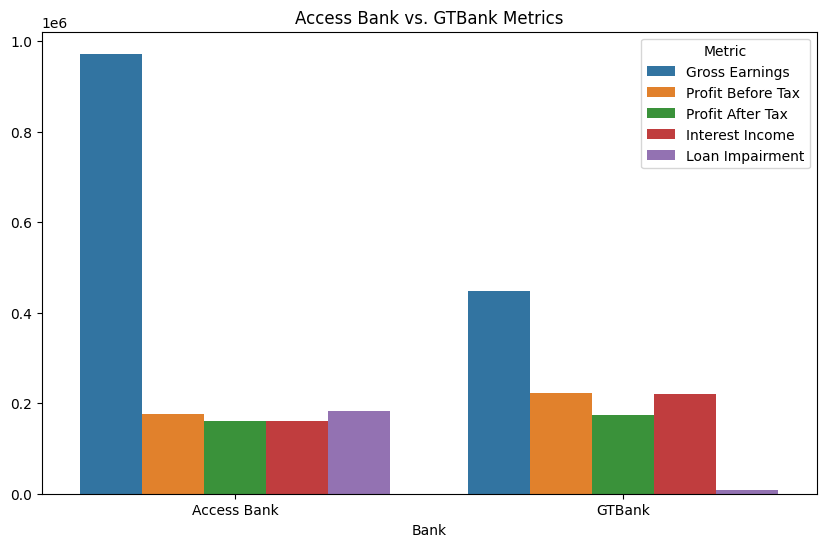

In [22]:
# Melt the DataFrame to have a 'Bank' column and a 'Value' column
df_melted = pd.melt(df, id_vars='Metric', var_name='Bank', value_name='Value')

# Create the bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Bank', y='Value', hue='Metric', data=df_melted)

# Add a legend
plt.legend(title='Metric', loc='upper right')

# Customize plot labels and title
plt.xlabel('Bank')
plt.ylabel('')
plt.title('Access Bank vs. GTBank Metrics')

# Show the plot
plt.show()

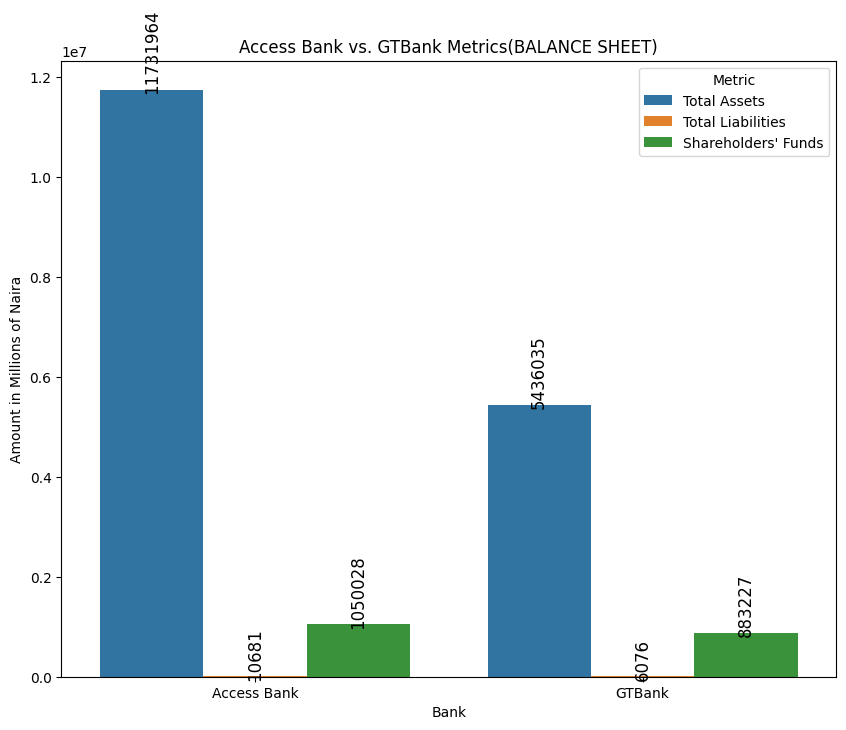

In [60]:

# Melt the DataFrame to have a 'Bank' column and a 'Value' column
df_melted = pd.melt(df, id_vars='Metric', var_name='Bank', value_name='Value')

# Create the bar plot with Seaborn
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Bank', y='Value', hue='Metric', data=df_melted)

# Add a legend
plt.legend(title='Metric', loc='upper right')

# Annotate values at the top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12, color='black', rotation=90)

# Customize plot labels and title
plt.xlabel('Bank')
plt.ylabel('Amount in Millions of Naira')
plt.title('Access Bank vs. GTBank Metrics(BALANCE SHEET)')

# Show the plot
#plt.show()
plt.savefig('plot_balance_sheet.svg', bbox_inches='tight')